<a href="https://colab.research.google.com/github/charbells/1864093_ProcesamientoDeDatos/blob/main/1864093_Tarea5Codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar librerias

import os
import pandas as pd
from PIL import Image
import numpy as np
import tensorflow as tf
import numpy as np
from PIL import Image
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
# Ruta a la carpeta principal donde están las carpetas de los animales
main_path = "/content/drive/MyDrive/ProcesamientoDatos/Animales"

# Crear una lista para almacenar datos
data = []

# Tomar imagenes de carpetas
for folder in os.listdir(main_path):
    folder_path = os.path.join(main_path, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if file.endswith(('.png', '.jpg', '.jpeg')):
                # Cargar imagen
                image = Image.open(file_path)
                # Convertir la imagen en array
                image_array = np.array(image)
                data.append({"image": image_array, "label": folder})

# DataFrame
df = pd.DataFrame(data)


In [3]:
# Ejemplo del DataFrame
print(df['label'].value_counts())


label
Perro       4873
Gallina     3098
Caballo     2623
Gato        1668
Elefante    1446
Name: count, dtype: int64


In [ ]:
# Todas las imagenes del mismo tamaño
IMG_SIZE = (64, 64)
resized_images = []

for img in df['image']:
    # Convertir a formato RGB
    resized_img = Image.fromarray(img).convert("RGB").resize(IMG_SIZE)
    resized_images.append(np.array(resized_img))

# Crear las variables X
X = np.array(resized_images)

# Crear variable y
y = np.array(df['label'].tolist())

# Normalizar las imágenes
X = X / 255.0


In [ ]:
# Realizar One-hot encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)  # One-hot encoding

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Data Augmentation (opcional)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Construir el modelo secuencial
model = Sequential()

# Capa convolucional 1
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Capa convolucional 2
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Aplanar la salida
model.add(Flatten())

# Capa oculta
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Capa de salida
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# Resumen del modelo
model.summary()

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

# Entrenar el modelo con data augmentation
train = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                  epochs=30,
                  validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,626,693 (6.21 MB)

 Trainable params: 1,626,245 (6.20 MB)

 Non-trainable params: 448 (1.75 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 255ms/step - accuracy: 0.2976 - loss: 2.1301 - val_accuracy: 0.3581 - val_loss: 3.3923
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 179ms/step - accuracy: 0.3952 - loss: 1.5532 - val_accuracy: 0.3581 - val_loss: 7.6746
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 179ms/step - accuracy: 0.4491 - loss: 1.3854 - val_accuracy: 0.3574 - val_loss: 9.0424
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 166ms/step - accuracy: 0.4791 - loss: 1.2974 - val_accuracy: 0.3421 - val_loss: 17.6536
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 167ms/step - accuracy: 0.5095 - loss: 1.2103 - val_accuracy: 0.3505 - val_loss: 8.3725
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 166ms/step - accuracy: 0.5454 - loss: 1.1476 - val_accuracy: 0.3683 - val_loss: 9.4968
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 166ms/step - accuracy: 0.5391 - loss: 1.1631 - val_accuracy: 0.3538 - val_loss: 20.7062
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 173ms/step - accuracy: 0.5721 - loss: 1.0804 - val_ac

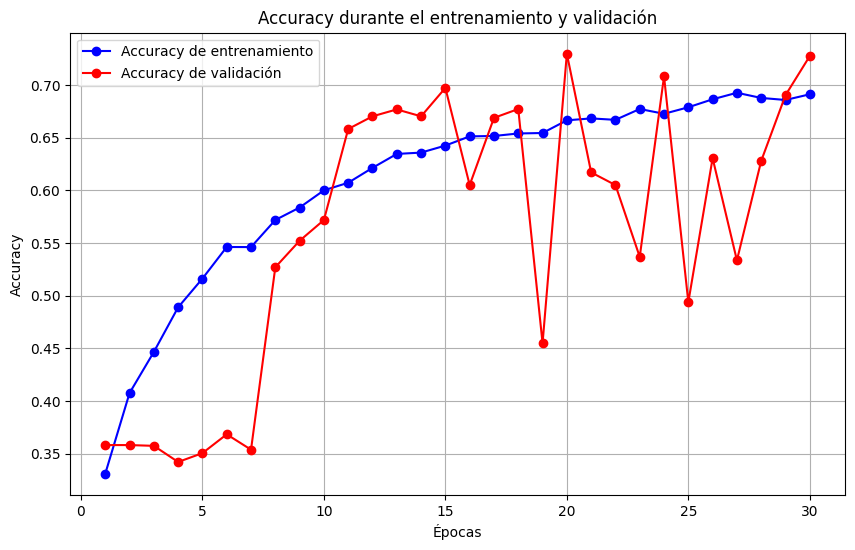

In [ ]:
import matplotlib.pyplot as plt

# Obtener el historial de accuracy y val_accuracy
accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']

# Obtener el número de épocas
epochs = range(1, len(accuracy) + 1)

# Graficar el accuracy y val_accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, 'bo-', label='Accuracy de entrenamiento')
plt.plot(epochs, val_accuracy, 'ro-', label='Accuracy de validación')
plt.title('Accuracy durante el entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluacion del modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Accuracy en test: {test_acc}")


86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7370 - loss: 0.9266
Accuracy en test: 0.7275711297988892


In [ ]:
# Función para cargar y preprocesar imagen nueva
def preprocess_image(image_path, img_size=(64, 64)):
    # Cargar imagen
    img = Image.open(image_path)
    # Convertir a RGB
    img = img.convert("RGB")
    # Diemnsionar la imagen
    img = img.resize(img_size)
    # Convertir a array
    img_array = np.array(img) / 255.0  # Normalizar

    return np.expand_dims(img_array, axis=0)

# Ruta a la imagen a probar
test_image_path = "/content/drive/MyDrive/ProcesamientoDatos/Perro_prueba.jpg"

# Preprocesar la imagen
preprocessed_image = preprocess_image(test_image_path)

# Predicción
predictions = model.predict(preprocessed_image)

# Clase con mayor probabilidad
predicted_class_index = np.argmax(predictions)
predicted_label = label_encoder.inverse_transform([predicted_class_index])

print(f"Predicción: {predicted_label[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
Predicción: Perro
